# Online retail dataset

In [50]:
#Identify customers with the highest and lowest number of orders.
#Determine which countries have the least number of orders.
#Discover which customers have the highest total spending.
#Find the customer who spent the most on a single item.
#Identify the month with the highest order volume.
#Determine the most frequently ordered product in each country.

# Pandas groupby function is essential for you to segment and aggregate your data. 
# Similar to a pivot table this allows you to group categories into different aggregations quickly to provide immediate insight.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# load in the dataset
df=pd.read_csv(r"C:\Users\rashmishra06\OneDrive\online _retail(1).csv")
df= df[df['Quantity']>0]

In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [16]:
df.insert(6,"Total",df['Quantity']*df['Price'])

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Total,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom


<Axes: xlabel='Customer ID'>

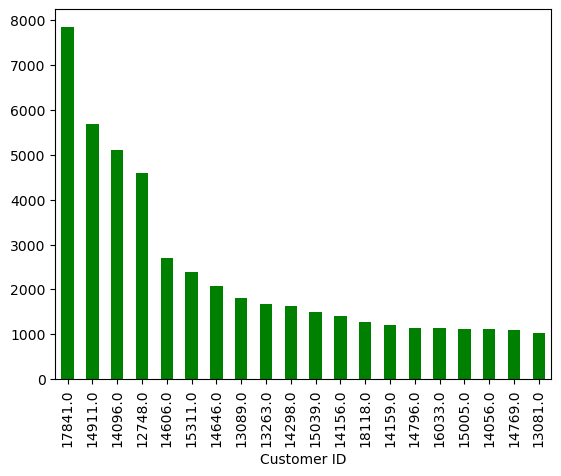

In [23]:
df.groupby('Customer ID')['InvoiceDate'].count().sort_values(ascending=False).head(20).plot(kind='bar',color='green')

In [26]:
df.groupby(['Customer ID','Country'])['Invoice'].count().sort_values(ascending=False).head(5)

Customer ID  Country       
17841.0      United Kingdom    7847
14911.0      EIRE              5677
14096.0      United Kingdom    5111
12748.0      United Kingdom    4596
14606.0      United Kingdom    2700
Name: InvoiceDate, dtype: int64

In [31]:
df.groupby(['Customer ID','Country'],as_index=False)['Invoice'].count().sort_values(by='Invoice',ascending=False).head(5)

,Customer ID,Country,Invoice
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


In [32]:
df.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(20)

,Description,Quantity
2401,"PAPER CRAFT , LITTLE BIRDIE",80995
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033
3950,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
1827,JUMBO BAG RED RETROSPOT,48478
3860,WHITE HANGING HEART T-LIGHT HOLDER,37895
2695,POPCORN HOLDER,36761
229,ASSORTED COLOUR BIRD ORNAMENT,36461
2351,PACK OF 72 RETROSPOT CAKE CASES,36419
2755,RABBIT NIGHT LIGHT,30788
2120,MINI PAINT SET VINTAGE,26633


In [34]:
df.groupby(['Customer ID','Description'])['Price'].max().sort_values(ascending=False)

Customer ID  Description                        
16029.0      POSTAGE                                8142.75
12536.0      Manual                                 4161.06
12744.0      Manual                                 3949.32
15502.0      Manual                                 3155.95
15581.0      Manual                                 2500.00
                                                     ...   
13239.0      CERAMIC BOWL WITH LOVE HEART DESIGN       0.00
16133.0      PADS TO MATCH ALL CUSHIONS                0.00
12647.0      ROUND CAKE TIN VINTAGE GREEN              0.00
14646.0      POLKADOT RAIN HAT                         0.00
12603.0      Manual                                    0.00
Name: Price, Length: 268295, dtype: float64

In [36]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Total          float64
Customer ID    float64
Country         object
dtype: object

In [42]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Total                 float64
Customer ID           float64
Country                object
dtype: object

In [43]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Total,Customer ID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12


<Axes: xlabel='Month'>

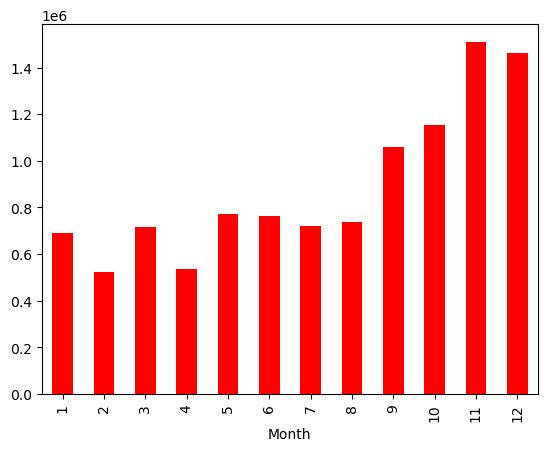

In [49]:
df.groupby('Month')['Total'].sum().plot(kind='bar',color='red')